### Table of Contents
- [Introduction](#introduction)
- [1. Loading dataset and libraries](#loading)
- [2. Preprocessing](#preprocessing)
    - [2.1 Rename columns](#rename-columns)
    - [2.2 Data types](#data-types)
    - [2.2 Missing values](#missing-values)
    - [2.3 Duplicated data](#duplicated-data)
- [3. Statistical description](#statistical)
    - [3.1 Description](#description)
    - [3.2 Scatter Plots, Clustering and Data Exploration](#exploration)
- [4. Models](#models)
    - [4.1 Data splitting](#splitting)
    - [4.2 Model Evaluation](#evaluation)
        - [4.2.1 RMSE](#rmse)
        - [4.2.2 R2](#r2)
        - [4.2.3 Repeated k-Fold Cross-Validation](#kfold)
    - [4.3 Linear Regression](#linear-regression)
    - [4.4 Polynomial Regression](#polynomial-regression)
    - [4.5 Lasso Regression](#lasso-regression)
    - [4.6 Decision Tree Regression](#decision-tree-regression)
    - [4.7 Random Forest Regression](#random-forest-regression)
    - [4.8 Support Vector Regression](#support-vector-regression)
    - [4.9 Bayesian Ridge Regression](#bayesian-ridge-regression)
    - [4.10 Ridge Regression](#ridge-regression)
    - [4.11 ElasticNet Regression](#elasticnet-regression)
    - [4.12 Scores Comparison](#scores-comparison)
- [5. Feature extraction](#feature-extraction)
    - [5.1 Correlation heatmap](#correlation-heatmap)
- [6. Hyperparameter tuning](#hyper)
    - [6.1 Default hyperparameters](#hyper-default)
    - [6.2 Random Hyperparameter Grid](#hyper-random-grid)
    - [6.3 Random Search Training](#hyper-random-train)
    - [6.4 Evaluate Random Search](#hyper-random-eval)
    - [6.5 Grid Search with CV](#grid-search)
    - [6.6 Grid Search Training](#grid-search-train)
    - [6.7 Grid Search Evaluation](#grid-search-eval)
- [Conclusion](#conclusion)

## Introduction <a name="introduction" />
### Danijel Sokolovic
### Indeks: 1392

NAPOMENA: postoji verovatnoca da neki komentari u kojima se pominju procenti poboljsanja ili nekih rezultata sa decimalama budu malo drugaciji zbog verzije kernela. Brojevi koji su upisani kao markdown tekst su brojevi koji su se pokazali prilikom rada. \
Pustio sam 50 puta ceo notebook na kraju svaki put sa restartom kernela, desava se da dodje do razlike. U pitanju je minimalna razlika, koja ne utice na generalnu sliku projekta (0.001 ili 0.0001 itd.).
### Energy efficiency

### Features
1. **X1 - A - Relative Compactness**\
This value is obtained by the sum of all surfaces of its envelope, divided by its gross heated volume.\
The Rc of a shape is derived in that its volume to surface ratio is compared to that of the most compact shape with the same volume.    
2. X2 - B - Surface Area
3. X3 - C - Wall Area
4. X4 - D - Roof Area
5. X5 - E - Overall Height
6. X6 - F - Orientation
7. X7 - G - Glazing Area
8. X8 - H - Glazing Area Distribution

### Output (target values)
- y1 Heating Load
- y2 Cooling Load

## 1. Loading dataset and libraries <a name="loading" />

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

df = pd.read_csv("en_eff.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [88]:
df.shape

(768, 10)

Vidimo da imamo 768 rows i 10 columns, features, sto se uklapa sa opisom dataseta.

## 2. Preprocessing <a name="preprocessing"/>

### 2.1 Rename columns  <a name="rename-columns"/>

In [89]:
df.columns = ['relative_compactness', 
              'surface_area', 
              'wall_area', 
              'roof_area', 
              'overall_height', 
              'orientation', 
              'glazing_area', 
              'glazing_distribution', 
              'heating_load', 
              'cooling_load']
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### 2.2 Data types  <a name="data-types"/>

In [90]:
df.dtypes

relative_compactness    float64
surface_area            float64
wall_area               float64
roof_area               float64
overall_height          float64
orientation               int64
glazing_area            float64
glazing_distribution      int64
heating_load            float64
cooling_load            float64
dtype: object

Potvrdjujemo da se radi samo sa brojevima, realni i celi brojevi.

### 2.3 Missing values  <a name="missing-values"/>

In [91]:
df.isnull().any()

relative_compactness    False
surface_area            False
wall_area               False
roof_area               False
overall_height          False
orientation             False
glazing_area            False
glazing_distribution    False
heating_load            False
cooling_load            False
dtype: bool

Proveravamo da li ima nekih NaN vrednosti. Zakljucak je da nema takvih vrednosti.

### 2.3 Duplicated data  <a name="duplicated-data"/>

In [92]:
duplicates = df.duplicated().sum()
duplicates

0

Proveravamo da li ima nekih duplih vrednosti, misli se na duplirane redove. Zakljucak je da nema dupliranih redova u datasetu.

## 3. Statistical Description  <a name="statistical"/>

### 3.1 Description <a name="description"/>

In [93]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Moze se primetiti da **max** vrednost za **heating_load** i **cooling_load** ne prelazi **50**. Takodje, **orientation** je izmedju vrednosti **2** i **5** (inkluzivno).\
**glazing_area**, **glazing_distribution**, **relative_compactness**, **overal_height** i **orientation** imaju veoma male vrednosti u odnosu na ostale.

### 3.2 Scatter Plots, Clustering and Data Exploration  <a name="exploration"/>

Uzimamo oba output-a, heating_load i cooling_load, u zavisnosti od prvog featur-a, relative_compactness.

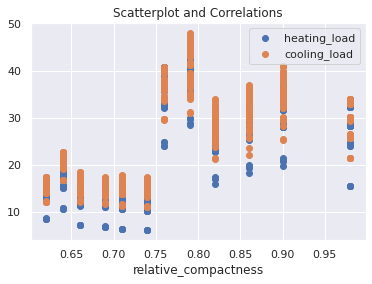

In [94]:
plt.scatter(df.relative_compactness, df.heating_load, label='heating_load')
plt.scatter(df.relative_compactness, df.cooling_load, label='cooling_load')

plt.title('Scatterplot and Correlations')
plt.xlabel('relative_compactness', fontsize=12)
plt.legend()
plt.show()

Ovde je predstavljena zavisnost heating_load i cooling_load od relative_compactness. Mozemo primetiti da postoje jasne grupacije, clusteri podataka. U primeru koji koristimo moze se primetiti da postoji 12 grupa u koje se moze podeliti relative_compactness.

Pod pretpostavkom da i ostale kolone sadrze odredjene "klase" u sebi, mozemo izvuci sve unique vrednosti iz svih kolona kao brzi test.

#### Number of uniques per column:

In [95]:
for c in df.columns:
    print("Number of unique values in {}: {}".format(c, len(df[c].unique())))

Number of unique values in relative_compactness: 12
Number of unique values in surface_area: 12
Number of unique values in wall_area: 7
Number of unique values in roof_area: 4
Number of unique values in overall_height: 2
Number of unique values in orientation: 4
Number of unique values in glazing_area: 4
Number of unique values in glazing_distribution: 6
Number of unique values in heating_load: 586
Number of unique values in cooling_load: 636


#### Unique values per column: 

In [96]:
for c in df.columns:
    print("Unique values in {}: {}".format(c, df[c].unique()))

Unique values in relative_compactness: [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
Unique values in surface_area: [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
Unique values in wall_area: [294.  318.5 343.  416.5 245.  269.5 367.5]
Unique values in roof_area: [110.25 122.5  147.   220.5 ]
Unique values in overall_height: [7.  3.5]
Unique values in orientation: [2 3 4 5]
Unique values in glazing_area: [0.   0.1  0.25 0.4 ]
Unique values in glazing_distribution: [0 1 2 3 4 5]
Unique values in heating_load: [15.55 20.84 21.46 20.71 19.68 19.5  19.95 19.34 18.31 17.05 17.41 16.95
 15.98 28.52 29.9  29.63 28.75 24.77 23.93  6.07  6.05  6.01  6.04  6.37
  6.4   6.85  6.79  6.77  6.81  7.18  7.1  10.85 10.54 10.77 10.56  8.6
  8.49  8.45  8.5  24.58 24.63 24.59 29.03 29.87 29.14 28.09 26.28 26.91
 26.37 25.27 23.53 24.03 23.54 22.58 35.56 37.12 36.9  35.94 32.96 32.12
 32.94 32.21 10.36 10.43 10.39 10.71 10.8  10.7  10.75 11.11 11.13 11.09
 11.16 

Ovaj rezultat potvrdjuje pretpostavku da sve kolone, sem naravno output kolona heating_load i cooling_load, imaju u sebi odredjene klastere ili "klase". Drugim recima, svi nasi ulazni parametri imaju svoje podele/klase unutar sebe. Tako npr. vidimo da relative_compactness ima 12 razlicitih vrednosti, orientation 4 itd. Posto znamo da je ukupan broj redova 768, vidimo da cak i heating/cooling load imaju neke duplikate, odnosno da se neke vrednosti ponavljaju, jer nema 768 uniques.

Posto smo ovo videli, sada mozemo vizuelno da proverimo svaku od njih, redom od prvog do poslednjeg feature.\
Za ovo cemo iskoristiti seaborn i hue parametar. Po x i y osama ce uvek biti output vrednosti, cooling_load i heating_load, respektivno, dok ce se raspodela i potencijalna zavisnost i grupacije videti kroz hue vrednost.

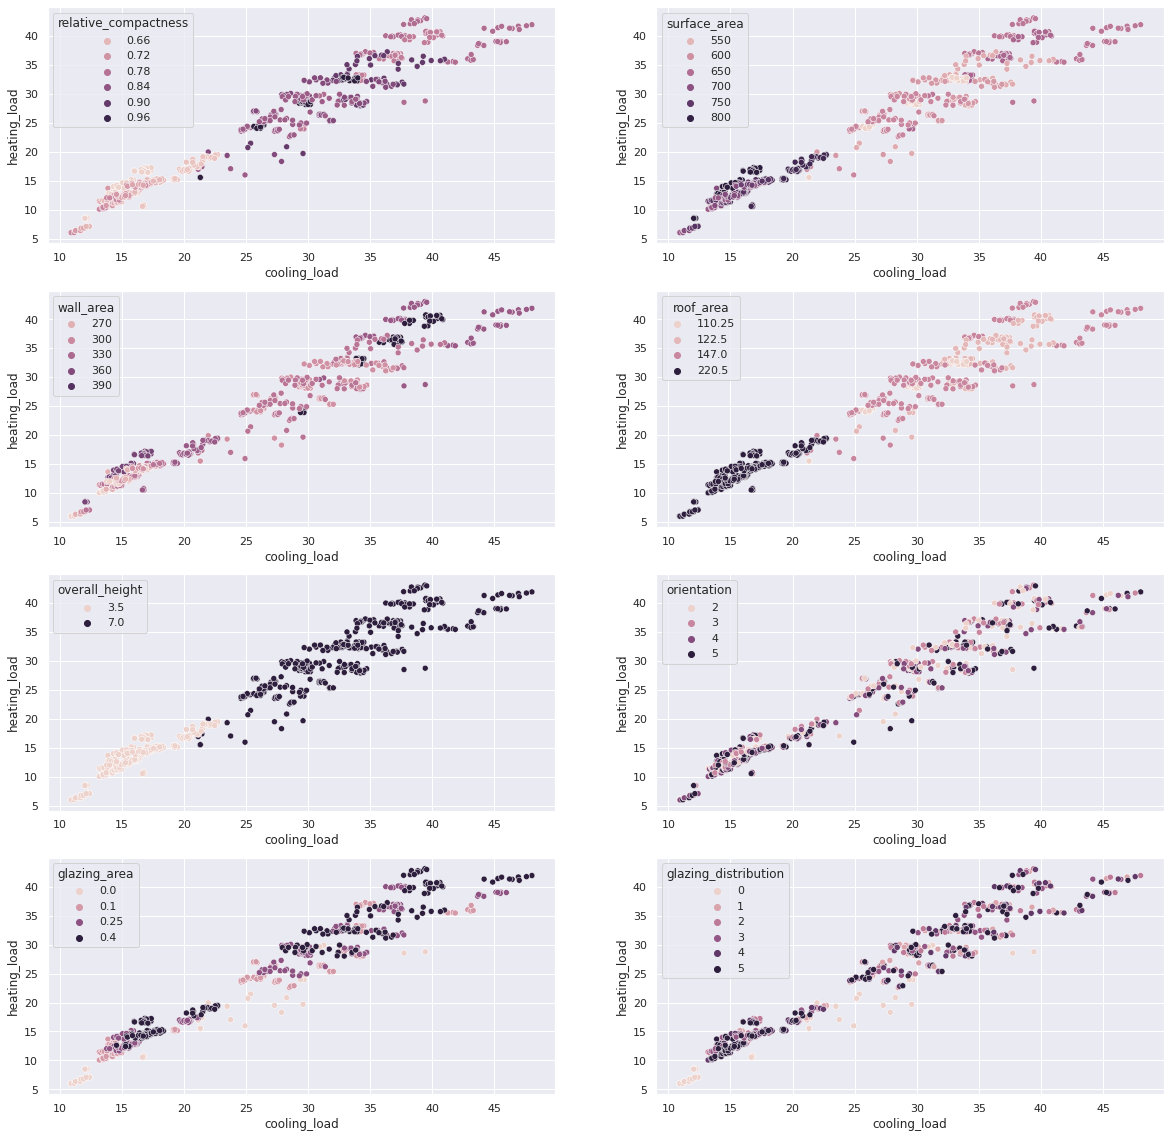

In [97]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))

sns.set_theme(style='darkgrid')
sns.scatterplot(ax=ax[0][0], x=df.cooling_load, y=df.heating_load, hue=df.relative_compactness, data=df)
sns.scatterplot(ax=ax[0][1], x=df.cooling_load, y=df.heating_load, hue=df.surface_area, data=df)
sns.scatterplot(ax=ax[1][0], x=df.cooling_load, y=df.heating_load, hue=df.wall_area, data=df)
sns.scatterplot(ax=ax[1][1], x=df.cooling_load, y=df.heating_load, hue=df.roof_area, data=df)
sns.scatterplot(ax=ax[2][0], x=df.cooling_load, y=df.heating_load, hue=df.overall_height, data=df)
sns.scatterplot(ax=ax[2][1], x=df.cooling_load, y=df.heating_load, hue=df.orientation, data=df)
sns.scatterplot(ax=ax[3][0], x=df.cooling_load, y=df.heating_load, hue=df.glazing_area, data=df)
sns.scatterplot(ax=ax[3][1], x=df.cooling_load, y=df.heating_load, hue=df.glazing_distribution, data=df)

plt.show()

Na osnovu ovog eksperimenta mozemo primetiti da postoje odredjene grupacije ili klasteri. To su one slike gde se najjasnije moze razlikovati neka grupa tacaka, na osnovu hue vrednosti, boje. To su grafici sa sledecim atributima hue vrednosti:
1. **relative_compactness** (u donjem levom uglu se izdvaja grupa, koja oznacava da manje vrednosti relative_compactness-a proizvode manje vrednosti cooling i heating load)
2. **surface_area** (u donjem levom uglu se izdvaja grupa, koja oznacava da vece vrednosti surface_area proizvode manje vrednosti cooling i heating load)
3. **roof_area** (u donjem levom uglu se izdvaja grupa, koja oznacava da vece vrednosti roof_area proizvode manje vrednosti cooling i heating load)
4. **overall_height** (na osnovu prethodnih eksperimenata, utvrdili smo da postoje samo 2 visine koje se pominju u datasetu. Ovde se zbog toga mozda i najjasnije vide grupe. Takodje, kao i kod prethodnih, u donjem levom uglu se jasno izdvaja grupa koja ukazuje na to da za manje vrednosti overall_height imamo manje vrednosti output-a)

Sve gore pomenute 4 slike imaju istu osobinu. Sve grupe su izdvojene tako da su "ogranicene" heating vrednoscu 20, i cooling vrednoscu oko 22-23.\
Sa druge strane, heating load i cooling load u direktoj vezi, za povecanje jednog - povecava se i drugo, sto je i ocekivano.
To mozemo pokazati na sledeci nacin.

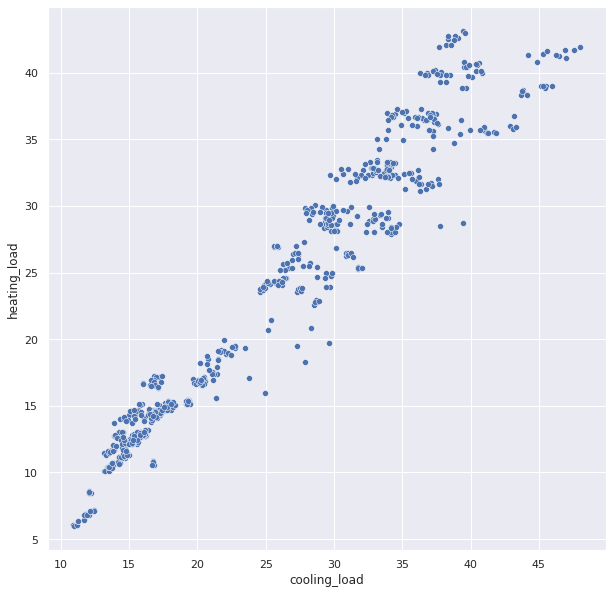

In [98]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.set_theme(style='darkgrid')
sns.scatterplot(x=df.cooling_load, y=df.heating_load, data=df)

plt.show()

Na osnovu slike iznad, vidimo da su heating i cooling load u direktnoj vezi. Postoji skoro linearna zavisnost. Drugim recima, povecanje heating vrednosti skoro linearno utice utice na povecanje cooling vrednosti i obrnuto. 

## 4. Models <a name="models"/>

### 4.1 Splitting <a name="splitting"/>

Razdvojicemo dataset u dva data seta. Prvi, koji ce sluziti za treniranje ce biti 80% od ukupnog, dok ce drugi (preostalih 20%) biti iskoriscen za testiranje.

In [99]:
X = df[['relative_compactness', 
        'surface_area', 
        'wall_area', 
        'roof_area', 
        'overall_height', 
        'orientation', 
        'glazing_area', 
        'glazing_distribution']]
Y = df[['heating_load']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3) # random_state controls the shuffling applied to the data before applying the split

Provera velicine dataseta:

In [100]:
print("Ceo dataset X: {}".format(X.shape))
print("Ceo dataset Y: {}".format(Y.shape))
print("X dataset za treniranje X_train: {}".format(X_train.shape))
print("X dataset za testiranje X_test: {}".format(X_test.shape))
print("Y dataset za treniranje Y_train: {}".format(Y_train.shape))
print("Y dataset za testiranje Y_test: {}".format(Y_test.shape))

Ceo dataset X: (768, 8)
Ceo dataset Y: (768, 1)
X dataset za treniranje X_train: (614, 8)
X dataset za testiranje X_test: (154, 8)
Y dataset za treniranje Y_train: (614, 1)
Y dataset za testiranje Y_test: (154, 1)


### 4.2 Model evaluation  <a name="evaluation"/>

#### 4.2.1 RMSE <a name="rmse"/>
$$RMSE = \sqrt{\frac {1}{n} \sum_{i=1}^{n}(y_i - \hat{y_i})^2}$$

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. A perfect RMSE value is 0.0, which means that all predictions matched the expected values exactly.

#### 4.2.2 R2_score (R squared score) <a name="r2"/>
$$R^2 = 1 - \frac{SumSquaredRegression}{TotalSumOfSquares} = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y_i})^2}$$

The SumSquaredRegression is the sum of the residuals squared, and the total sum of squares is the sum of the distance the data is away from the mean all squared. As it is a percentage it will take values between 0 and 1.

The coefficient of determination, or R squared, is a measure that provides information about the goodness of fit of a model. In the context of regression it is a statistical measure of how well the regression line approximates the actual data. It is therefore important when a statistical model is used either to predict future outcomes or in the testing of hypotheses. There are a number of variants (see comment below); the one presented here is widely used

#### 4.2.3 Repeated k-Fold Cross-Validation  <a name="kfold"/>

The k-fold cross-validation procedure divides a limited dataset into k non-overlapping folds. Each of the k folds is given an opportunity to be used as a held back test set, whilst all other folds collectively are used as a training dataset. A total of k models are fit and evaluated on the k hold-out test sets and the mean performance is reported.
$$MAE = \frac{\sum_{i=1}^{n}abs({y_i - \lambda(x_i)})}{n}$$
Given any test data-set, Mean Absolute Error of your model refers to the mean of the absolute values of each prediction error on all instances of the test data-set. Prediction error is the difference between the actual value and the predicted value for that instance.
Statistically, Mean Absolute Error (MAE) refers to a the results of measuring the difference between two continuous variables. Let’s assume variables M and N represent the same phenomenon but have recorded different observations.

In [101]:
model_perfs = {}
def RepeatedKFoldPerf(m, x, y):
    result = ""
    
    # Repeated k-Fold Cross=Validation MAE
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(m, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    scores = absolute(scores)
    result += 'MAE: %.3f (%.3f)' % (mean(scores), std(scores))
    
    return result

### 4.3 Linear Regression  <a name="linear-regression"/>

In [102]:
lin_model = LinearRegression()

print("RKFold performance {}".format(RepeatedKFoldPerf(lin_model, X, Y)))

lin_model.fit(X_train, Y_train)
print("R2 score: {}".format(lin_model.score(X_test, Y_test)))
model_perfs['linear'] = lin_model.score(X_test, Y_test)

RKFold performance MAE: 2.085 (0.260)
R2 score: 0.921854284088875


### 4.4 Polynomial Regression  <a name="polynomial-regression"/>

In [103]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
poly_model = LinearRegression()

print("RKFold performance: {}".format(RepeatedKFoldPerf(poly_model, X_poly, Y)))

poly_model.fit(X_train, Y_train)
print("R2 score: {}".format(poly_model.score(X_test, Y_test)))
model_perfs['polynomial'] = poly_model.score(X_test, Y_test)

RKFold performance: MAE: 0.346 (0.042)
R2 score: 0.921854284088875


### 4.5 Lasso Regression  <a name="lasso-regression"/>

In [104]:
lasso_model = Lasso(alpha=0.01)

print("RKFold performance: {}".format(RepeatedKFoldPerf(lasso_model, X, Y)))

lasso_model.fit(X_train, Y_train)
print("R2 score: {}".format(lasso_model.score(X_test, Y_test)))
model_perfs['lasso'] = lasso_model.score(X_test, Y_test)

RKFold performance: MAE: 2.213 (0.240)
R2 score: 0.9175303161178504


### 4.6 Decision Tree Regression  <a name="decision-tree-regression"/>

In [105]:
tree_model = DecisionTreeRegressor()

print("RKFold performance: {}".format(RepeatedKFoldPerf(tree_model, X, Y)))

tree_model.fit(X_train, Y_train)
print("R2 score: {}".format(tree_model.score(X_test, Y_test)))
model_perfs['decision_tree'] = tree_model.score(X_test, Y_test)

RKFold performance: MAE: 0.357 (0.052)
R2 score: 0.9963962171218154


### 4.7 Random Forest Regression  <a name="random-forest-regression"/>

In [106]:
#rf_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_model = RandomForestRegressor()

print("RKFold performance: {}".format(RepeatedKFoldPerf(rf_model, X, Y.values.ravel())))

rf_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(rf_model.score(X_test, Y_test)))
model_perfs['random_forest'] = rf_model.score(X_test, Y_test)

RKFold performance: MAE: 0.313 (0.038)
R2 score: 0.997644588210451


### 4.8 Support Vector Regression  <a name="support-vector-regression"/>

In [107]:
svr_model = SVR(kernel = 'rbf')

print("RKFold performance: {}".format(RepeatedKFoldPerf(svr_model, X, Y.values.ravel())))

svr_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(svr_model.score(X_test, Y_test)))
model_perfs['support_vector'] = svr_model.score(X_test, Y_test)

RKFold performance: MAE: 3.885 (0.468)
R2 score: 0.7286712123385257


### 4.9 Bayesian Ridge Regression  <a name="bayesian-ridge-regression"/>

In [108]:
bayes_ridge_model = BayesianRidge()

print("RKFold performance: {}".format(RepeatedKFoldPerf(bayes_ridge_model, X, Y.values.ravel())))

bayes_ridge_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(bayes_ridge_model.score(X_test, Y_test)))
model_perfs['bayes_ridge'] = bayes_ridge_model.score(X_test, Y_test)

RKFold performance: MAE: 2.095 (0.257)
R2 score: 0.9209171817646942


### 4.10 Ridge Regression  <a name="ridge-regression"/>

In [109]:
ridge_model = Ridge(alpha=1.0)

print("RKFold performance: {}".format(RepeatedKFoldPerf(ridge_model, X, Y.values.ravel())))

ridge_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(ridge_model.score(X_test, Y_test)))
model_perfs['ridge'] = ridge_model.score(X_test, Y_test)

RKFold performance: MAE: 2.201 (0.242)
R2 score: 0.9181267401815916


### 4.11 ElasticNet Regression  <a name="elasticnet-regression"/>

In [110]:
elastic_model = ElasticNet(alpha=0.01, l1_ratio=1.0)

print("RKFold performance: {}".format(RepeatedKFoldPerf(elastic_model, X, Y.values.ravel())))

elastic_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(elastic_model.score(X_test, Y_test)))
model_perfs['elastic_net'] = elastic_model.score(X_test, Y_test)

RKFold performance: MAE: 2.213 (0.240)
R2 score: 0.9175303161178504


### 4.12 Scores comparison  <a name="scores-comparison"/>

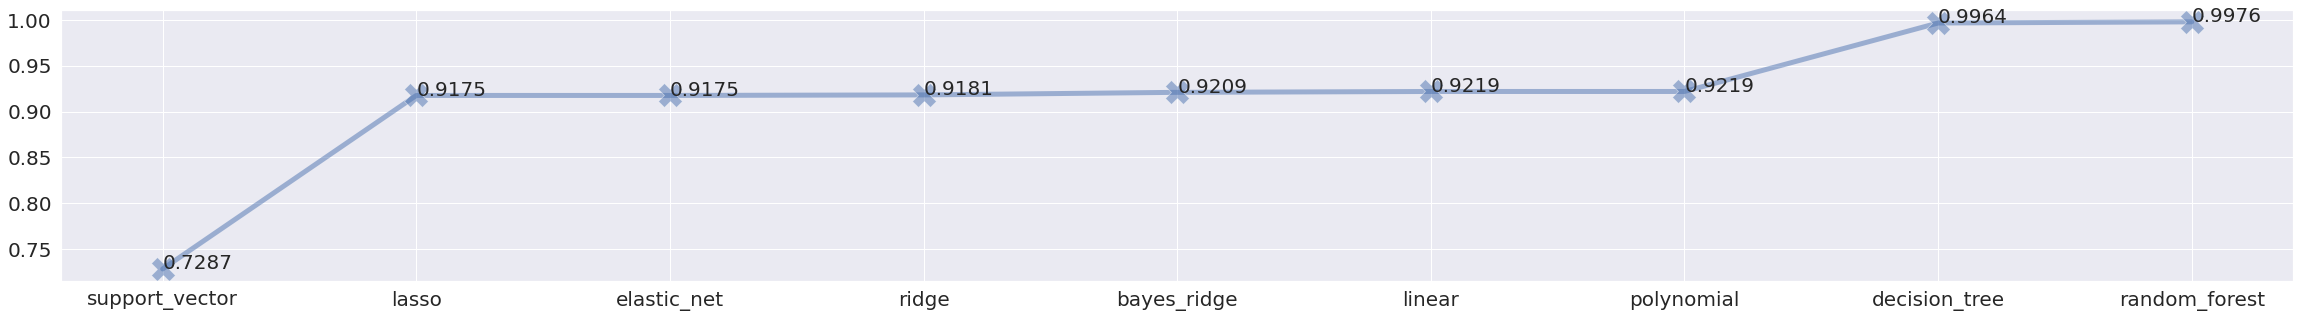

In [111]:
sorted_dict = sorted(model_perfs.items(), key=lambda kv: kv[1])
sorted_dict = collections.OrderedDict(sorted_dict)

fig_dims = (40, 5)
fig, ax = plt.subplots(figsize=fig_dims)

ax.tick_params(labelsize=20)

for key, value in sorted_dict.items():
    ax.text(key, value, value.round(4), size=20)

sns.lineplot(
    data=sorted_dict,
    dashes=False,
    palette="Set1",
    marker="X",
    markersize=24,
    alpha=0.5,
    ax=ax,
    linewidth = 5
)

plt.show()

## 5. Feature Extraction <a name="feature-extraction"/>

### 5.1 Data Correlation  <a name="correlation-heatmap"/>

Kako bismo dalje potvrdili korelaciju izmedju odredjenih atributa, mozemo iskoristiti korelacionu matricu, gde cemo prikazati sve atribute. Vrednosti se krecu od -1 do 1.

**-1** - sto je vrednost bliza -1, jaca je negativna korelacija\
**0** - vrednosti u okolini nule, znace da je korelacija slabija - ne postoji u nuli\
**1** - sto je vrednost bliza jedinici, jaca je pozitivna korelacija

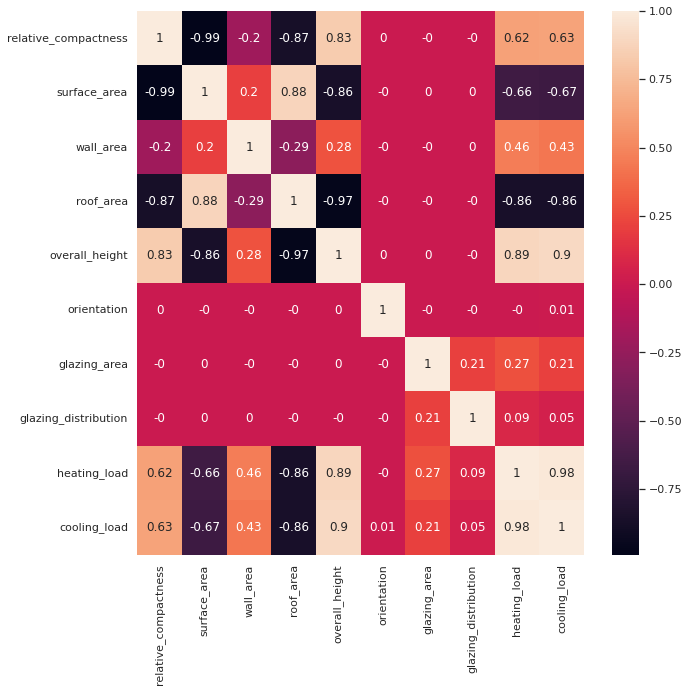

In [112]:
fig, ax = plt.subplots(figsize=(10, 10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Na osnovu korelacione matrice mozemo izvesti neke nove zakljucke, ali i potvrditi neka prethodno pomenute pretpostavke:
* vrednosti matrice koje su oko **0**, nemaju uticaj na heating i cooling load. Npr. mozemo videti da **orientation** ima vrednosti - **0/0.01** za heating/cooling load.
* korelacione vrednosti izmedju **glazing_distribution** i heating/cooling load su takodje male - **0.09/0.05**
* **glazing_area** korelaciona vrednost je malo bliza vrednosti **1**, sto znaci da postoji veoma slaba korelacija - **0.27/0.21**
* korelacija izmedju **heating i cooling load** je **0.98**, sto potvrdjuje razmatranja iz prethodnih koraka, da su u snaznoj korelaciji
* **overall_height** ima jaku pozitivnu korelaciju **0.89/0.9** sa obe nase target vrednosti
* **roof_area ima** jaku negativnu korelaciju **-0.86/-0.86** sa obe nase target vrednosti
* **relative_compactness** i **surface_area** imaju slicne vrednosti, ali suprotnog znaka. **0.62/0.63** za relative_compactness, odnosno, **-0.66/-0.67** za surface_area
* **wall_area** ima vrednost **0.46/0.43**, sto je malo slabije u odnosu na relative compactness na primer.

**orientation i glazing_distribution su u vrlo slaboj korelaciji sa output vrednostima.**

In [133]:
X = df[['relative_compactness', 
        'surface_area', 
        'wall_area', 
        'roof_area', 
        'overall_height', 
        #'orientation', 
        'glazing_area', 
        #'glazing_distribution'
       ]]
Y = df[['heating_load']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3) # random_state controls the shuffling applied to the data before applying the split

In [134]:
#rf_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_model = RandomForestRegressor()

print("RKFold performance: {}".format(RepeatedKFoldPerf(rf_model, X, Y.values.ravel())))

rf_model.fit(X_train, Y_train.values.ravel())
print("R2 score: {}".format(rf_model.score(X_test, Y_test)))
model_perfs['random_forest'] = rf_model.score(X_test, Y_test)

RKFold performance: MAE: 0.352 (0.042)
R2 score: 0.9976480361212613


Zakljucujemo, uz pomoc korelacione matrice, da orientation i glazing_distribution imaju skoro nebitan uticaj na performanse modela. Dalje smo potvrdili to, time sto smo ih izbacili iz dataseta i opet dobili vrednost oko 0.997 za R2 score.\
(Sitna napomena: "preglednije" je bilo da komentarom ukljujem i iskljucujem sta ulazi u dataset umesto pandas drop-a dok sam testirao)

## 6. Hyperparameter tuning <a name="hyper"/>

### 6.1 Default hyperparameters <a name="hyper-default"/>

Posto se Random Forest Regression algoritam pokazao kao najbolji pri prethodnim eksperimentima, nastavicemo sa njim. Za pocetak da vidimo koji su sve hiperparametri dostupni.

In [135]:
rf_model = RandomForestRegressor()
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### Random Forest - Hyperparameters sklearn definitions:
- **bootstrapbool, default=True**\
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
- **ccp_alphanon-negative float, default=0.0**\
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed.
- **criterion{“gini”, “entropy”}, default=”gini”**\
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_depth : int, default=None**\
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”**\
    The number of features to consider when looking for the best split:\
    If int, then consider max_features features at each split.\
    If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.\
    If “auto”, then max_features=sqrt(n_features).\
    If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).\
    If “log2”, then max_features=log2(n_features).\
    If None, then max_features=n_features.\
    Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.\
- **max_leaf_nodes : int, default=None**\
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **max_samplesint or float, default=None**\
If bootstrap is True, the number of samples to draw from X to train each base estimator.\
If None (default), then draw X.shape[0] samples.\
If int, then draw max_samples samples.\
If float, then draw max_samples * X.shape[0] samples. Thus, max_samples should be in the interval (0.0, 1.0].
- **min_impurity_decrease : float, default=0.0**\
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
- **min_samples_leaf : int or float, default=1**\
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.\
If int, then consider min_samples_leaf as the minimum number.\
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
- **min_samples_split : int or float, default=2**\
The minimum number of samples required to split an internal node:\
If int, then consider min_samples_split as the minimum number.\
If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
- **min_weight_fraction_leaf : float, default=0.0**\
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **n_estimators : int, default=100**\
The number of trees in the forest.
- **n_jobsint, default=None**\
The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
- **oob_scorebool, default=False**\
Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.
- **random_state : int, RandomState instance or None, default=None**\
Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
- **verbose : int, default=0**\
Controls the verbosity when fitting and predicting.
- **warm_startbool, default=False**\
When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

### 6.2 Random Hyperparameter Grid  <a name="hyper-random-grid"/> 

Pravljenje grid-a. Grid predstavlja nasumicno odabrane vrednosti koje ce se koristiti za evaluaciju. Za odabrane parametre cemo uzeti range nekih vrednosti koje cemo koristiti.

In [136]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


U ovom slucaju bismo imali 2 * 12 * 2 * 3 * 3 * 10 = 4320 razlicitih podesavanja koja moraju da se ispitaju.

### 6.3 Random Search Training  <a name="hyper-random-train"/>

In [137]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [138]:
pprint(rf_random.best_params_)

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1800}


### 6.4 Evaluate Random Search <a name="hyper-random-eval"/>

In [139]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train.values.ravel())
base_accuracy = evaluate(base_model, X_test, Y_test.values.ravel())

Model Performance
Average Error: 0.3476 degrees.
Accuracy = 98.32%.


In [140]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test.values.ravel())

Model Performance
Average Error: 0.3349 degrees.
Accuracy = 98.48%.


Prilikom stampanja poboljsanja dobicemo odstampane i hyperparametre koji su korisceni u svakoj iteraciji, tako da vidimo kombinacije koje su isprobane.

In [141]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.16%.


Blago poboljsanje od 0.16%.

### 6.5 Grid Search <a name="grid-search"/>

Random search nam je pomogao da vidimo okvirno u kojim opsezima se nalaze najbolje vrednosti za odabrane hyperparametre. Sada cemo probati "oko" tih vrednosti da ispitamo detaljnije uz pomoc grid-a.

In [142]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100],
    'max_features': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2],
    'n_estimators': [700, 800, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

Na osnovu grida koji smo postavili, slicno kao i kod random, vidimo da ce biti isprobano 1 * 2 * 5 * 3 * 1 * 3 = 90 kombinacija - kandidata. Sada mozemo da uradimo treniranje i evaluaciju.

### 6.6 Grid Search Training<a name="grid-search-train"/>

In [143]:
# Fit the grid search to the data
grid_search.fit(X_train, Y_train.values.ravel())
grid_search.best_params_

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   3.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.9s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=8

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

### 6.7 Grid Search Evaluation<a name="grid-search-eval"/>

In [144]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, Y_test.values.ravel())

Model Performance
Average Error: 0.3437 degrees.
Accuracy = 98.39%.


In [145]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.07%.
[CV] END bootstrap=True, max_depth=90, max_features=5, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=90, max_features=6, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=2, min_samples_split=2, n_estimators=700; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, max_depth=100

Dobijamo vrlo slicnu vrednost. Uporedjivanjem Random search i Grid search vidimo da su vrednosti accuracy, za oba, oko **98.5%**.

## 7. Conclusion <a name="conclusion"/>

U ovom projektu su prikazane osnove nadgledanog masinskog ucenja, kroz razlicite tehnike i biblioteke. Nije bilo nekih posebnih izazova, iako je ovo prvi projekat ovog tipa na kojem sam radio. Potvrdjena je pocetna pretpostavka da nisu svi features veoma bitni, sto smo zakljucili i proverili kroz poglavlja. Nakon njihovog izbacivanja, performanse su ostale manje-vise iste. Pored srzi masinskog ucenja, koje smatram izuzetno interesantim, posebno bih izdvojio vizuelizaciju podataka, koja u slucaju da se dobro uradi (iz dobrog ugla/perspektive), moze mnogo toga da kaze o osobinama koje se kriju u podacima.